In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Block splitting

(567, 567, 3)


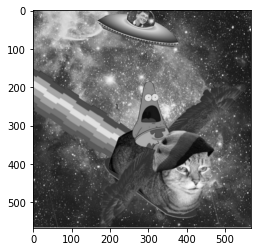

In [344]:
img = plt.imread("img.png")
plt.imshow(img, cmap='gray')
print(img.shape)

In [53]:
dummy = np.zeros((16, 7))
count = 0
for i in range(0, dummy.shape[0], 8):
    for j in range(0, dummy.shape[1], 8):
        dummy[i:i+8, j:j+8] = count
        count += 1

In [4]:
def sliding_window(img):
    """
        8x8 sliding window over image

        TODO: yield macro block later ?
    """
    for i in range(0, img.shape[0], 8):
        for j in range(0, img.shape[1], 8):
            print(img[i:i+8, j:j+8].shape)
            print(img[i:i+8, j:j+8])

In [192]:
print((3 // 2), (3 // 2) + 1)
print((5 // 2), (5 // 2) + 1)

1 2
2 3


In [193]:
print((11 // 2), (11 // 2) + 1)

5 6


In [ ]:
# 3 -> 2, 1
# 5 -> 2, 3

In [389]:
def padding(img, mode="black"):
    """
        Only work for each 
    """
    print(f"before: {img.shape}")

    # Round up to nearest multiple of 8
    w = (img.shape[0] + 7) & (-8)
    h = (img.shape[1] + 7) & (-8)

    # Smarter padding -> Pad with image center in middle.
    delta_w = w - img.shape[0]
    delta_h = h - img.shape[1]
    
    ax1_top, ax1_bot, ax2_left, ax2_right = 0, 0, 0, 0

    if delta_w != 0:
        ax1_top, ax1_bot = (delta_w//2) , (delta_w//2)
        if delta_w % 2 == 1:    
            ax1_bot = (delta_w//2) + 1
    
    if delta_h != 0:
        ax2_left, ax2_right = (delta_h//2) , (delta_h//2)
        if delta_h % 2 == 1:
            ax2_right = (delta_h//2) + 1

    if mode == "black":
        img = np.pad(img, [(ax1_top , ax1_bot), (ax2_left, ax2_right)], 'constant')
    elif mode == "replicate":
        img = np.pad(img, [(ax1_top, ax1_bot), (ax2_left, ax2_right)], 'symmetric')
    else:
        raise ValueError("This mode doesn't exist")

    print(f"after: {img.shape}")
    return img

In [390]:
dummy = np.ones((4, 4))
print(padding(dummy, mode="black"))

before: (4, 4)
after: (8, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


(265, 325, 3)


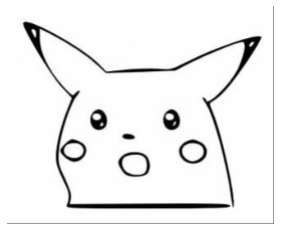

In [391]:
img = plt.imread("pikachu-crop.png")
print(img.shape)
plt.axis('off')
plt.imshow(img, cmap='gray')

before: (265, 325)
after: (272, 328)


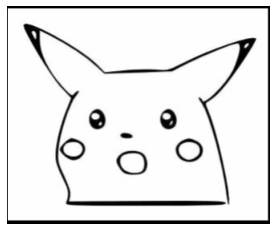

In [394]:
new_img = padding(img[..., 0], mode="black")
plt.axis('off')
plt.imshow(new_img, cmap='gray')

# Step 2: Discrete cosine transform

# Step 3: Quantization

# Step 4: Zigzag ordering + Entropy coding